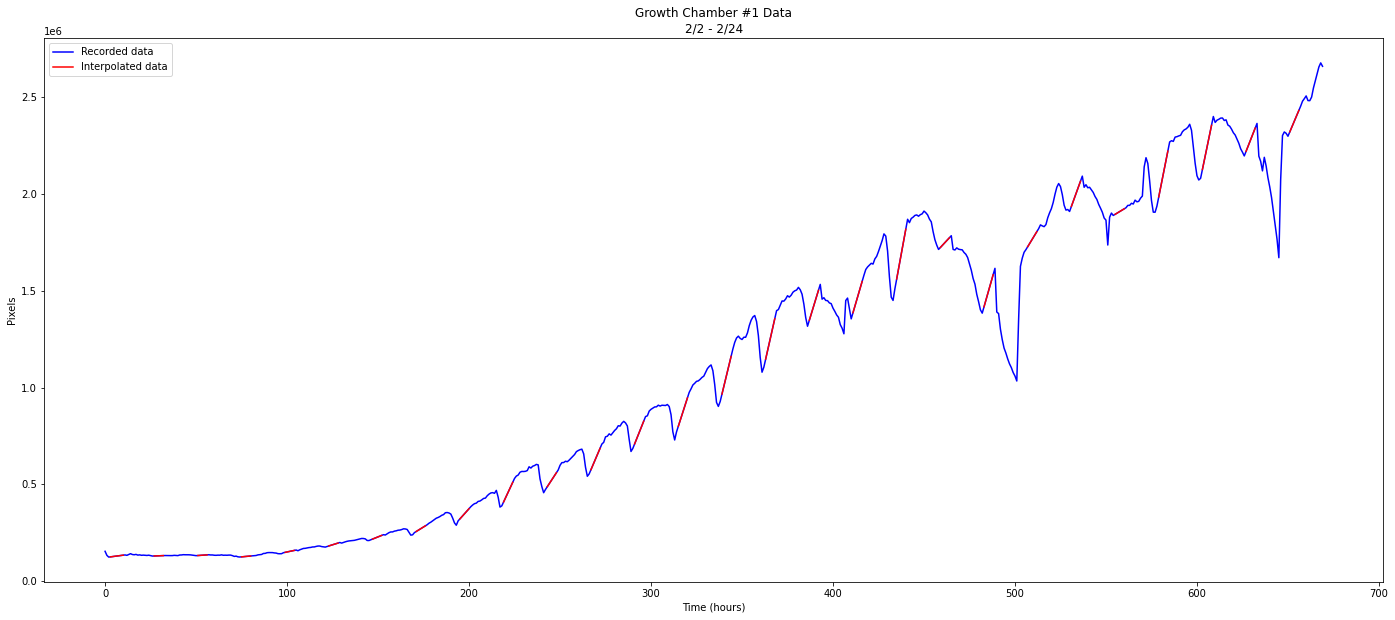

In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [24, 10]

os.chdir("F:/Pi13")

offset = 24

data = pd.read_csv("./data.csv",delimiter=",", header=0)[offset:]['InterestingPixels']
data = pd.DataFrame([f if f != 0 else None for f in data])

interpolatedData = data.interpolate()
interpolatedData =  interpolatedData.values.tolist()
interpolatedData = [i[0] for i in interpolatedData]

data = data.values.tolist()
data = [i[0] for i in data]

onlyInterpolatedData = []
for i in range(0, len(data)):
    if interpolatedData[i] == data[i]:
        onlyInterpolatedData.append(None)
    else:
        onlyInterpolatedData.append(interpolatedData[i])

plt.plot(interpolatedData, color="blue", label="Recorded data")
plt.plot(onlyInterpolatedData, color="red", label="Interpolated data")
plt.legend(loc='best')
plt.title("Growth Chamber #1 Data\n2/2 - 2/24")
plt.ylabel("Pixels")
plt.xlabel("Time (hours)")
lines = [94, 191, 263, 335, 359, 461, 526, 575, 670]
plt.axhline(0, color='black')
for line in lines:
    if line > offset:
        plt.axvline(line - offset, color="black")

Text(0.5, 0, 'Time')

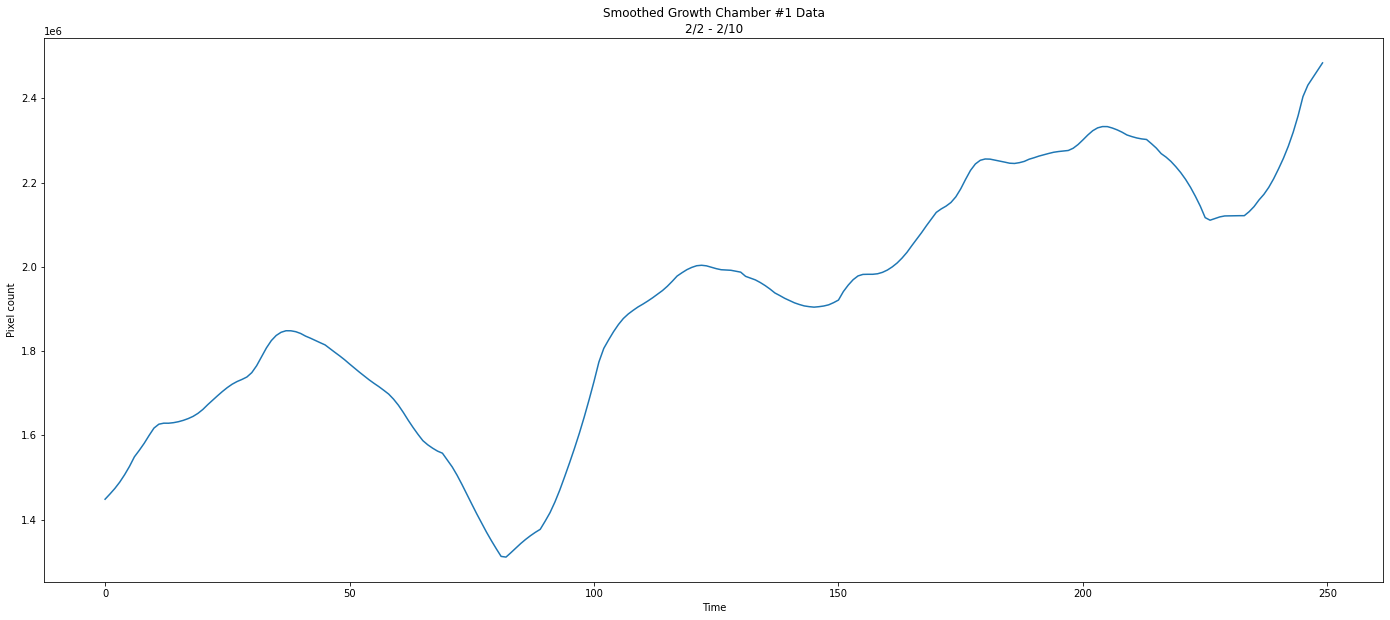

In [2]:
from tools import rollingAverage
plt.plot(rollingAverage(20, interpolatedData))
plt.title("Smoothed Growth Chamber #1 Data\n2/2 - 2/10")
plt.ylabel("Pixel count")
plt.xlabel("Time")

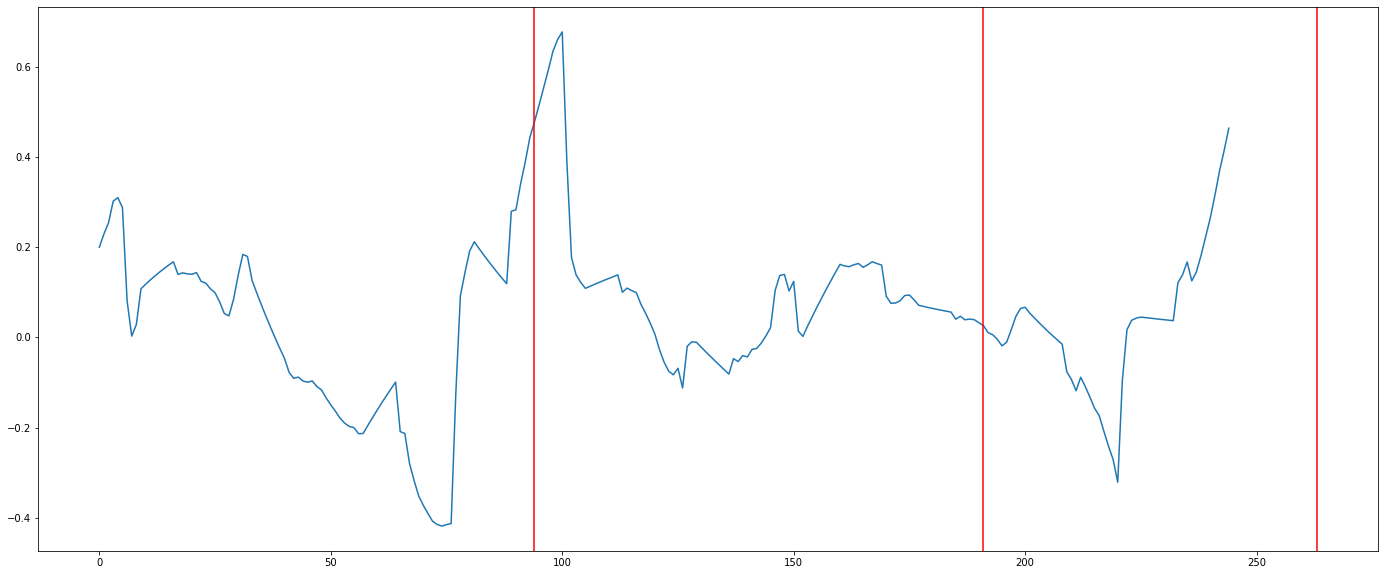

In [3]:
from tools import RGR
rgr = []
for i in range(24, len(interpolatedData)):
    rgr.append(RGR(interpolatedData[i - 24], interpolatedData[i]))
plt.plot(rgr)
waterings = [94, 191, 263]
for i in waterings:
    plt.axvline(x=i, color="red")


Text(0.5, 0, 'Time')

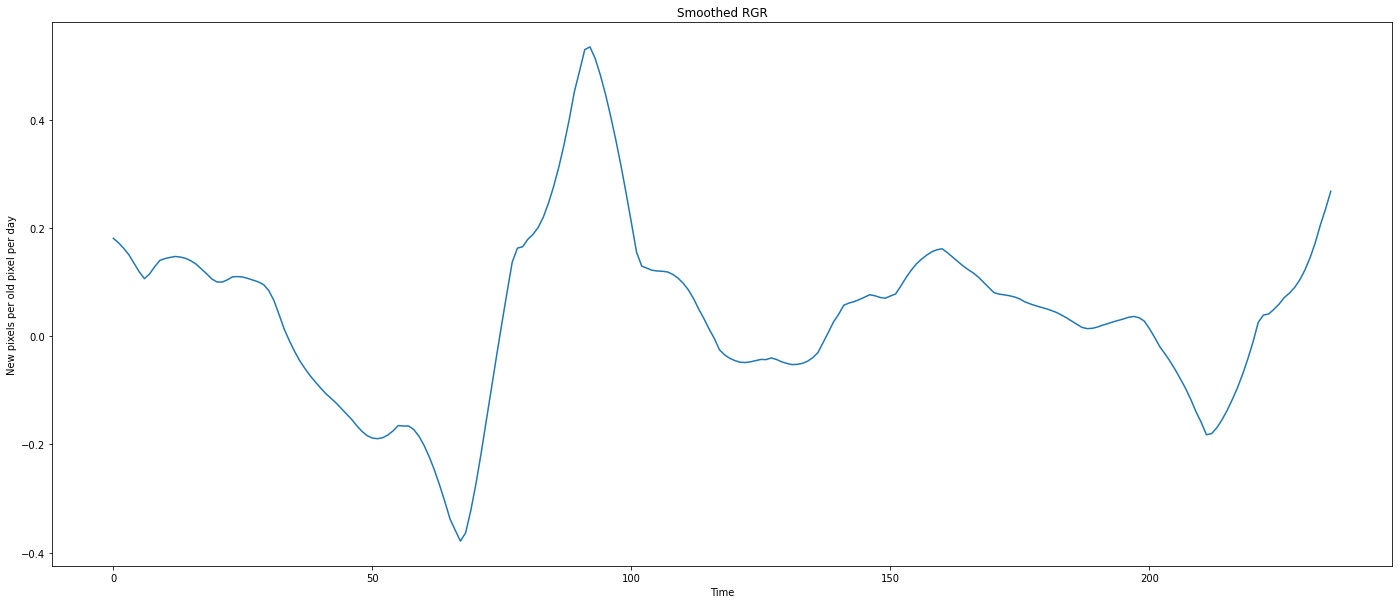

In [4]:
plt.plot(rollingAverage(10, rgr))
plt.title("Smoothed RGR")
plt.ylabel("New pixels per old pixel per day")
plt.xlabel("Time")